In [49]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import datetime

In [50]:
df = pd.read_csv('data/HFER_e_lat_lon.csv', encoding = "utf-8",index_col = 'Election Date')

/anaconda3/envs/GTAem/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
df = df[pd.to_datetime(df.index) > pd.to_datetime('1994-01-01')]
df= df[df['Province']=='Quebec']

In [52]:
df.head()

,Election Type,Parliament,Province,Riding,Last Name,First Name,Gender,Occupation,Party,Votes,Votes (%),Elected,City,lat,lon
Election Date,,,,,,,,,,,,,,,
1995-02-13,B/P,35,Quebec,BROME--MISSISQUOI,Paradis,Denis,NaN,lawyer,Liberal,19078,51.02,1,brome,45.189207,-72.562857
1995-02-13,B/P,35,Quebec,BROME--MISSISQUOI,Bertrand,Jean-François,NaN,communication consultant,Bloc Québécois,15764,42.16,0,brome,45.189207,-72.562857
1995-02-13,B/P,35,Quebec,BROME--MISSISQUOI,Lever,Guy,NaN,administrator,Progressive Conservative,1235,3.30,0,brome,45.189207,-72.562857
1995-02-13,B/P,35,Quebec,BROME--MISSISQUOI,Maheux,Line,NaN,marketing consultant,Reform Party of Canada,517,1.38,0,brome,45.189207,-72.562857
1995-02-13,B/P,35,Quebec,BROME--MISSISQUOI,Vachon,Paul,NaN,retired,New Democratic Party,371,0.99,0,brome,45.189207,-72.562857


In [53]:
# give number for each major party or other
def partyLabel (row):
    if row['Party']=='Liberal':
        return 0
    elif (row['Party']=='Conservative' or row['Party']=='Progressive Conservative'or
            row['Party']== 'Reform Party of Canada' or row['Party']== 'Reform'or
         row['Party']== 'Canadian Alliance'or row['Party']=='Conservative Party of Canada'):
        return 1
    elif row['Party']=='New Democratic Party' or row['Party']== 'Co-operative Commonwealth Federation':
        return 2
    elif row['Party']=='Green Party of Canada':
        return 3
    elif row['Party']=='Bloc Québécois':
        return 4
    else:
        return 5
df['partyLabel']= df.apply (lambda row: partyLabel(row), axis=1)

In [54]:
#dataframe with one row per riding per date
parties=['Liberal','Conservative','NDP','Green','Bloc','Other']
dfUnique=pd.DataFrame(columns=['Election Date', 'Province', 'Riding','lat','lon',
                                'Results','Liberal','Conservative','NDP','Green','Bloc','Other'])
prevRiding=''
i=0
for date, row in df.iterrows():
    print(date)
    percentVotes=row['Votes (%)']/100
    if prevRiding != row['Riding']:
        if i>2 and 0.98> sum(dfUnique['Results'][i]) >1.02:
            print("!!! Sum of results is not 1!!!", sum(dfUnique['Results'][i]),dfUnique['Election Date'][i],dfUnique['Riding'][i] )    
        i+=1
        Results=np.zeros(6)
        Results[row['partyLabel']]+= percentVotes
        dfUnique.loc[i]=[date,row['Province'],row['Riding'],row['lat'],row['lon'],Results,0,0,0,0,0,0]
        dfUnique[parties[row['partyLabel']]][i]+=percentVotes
    elif prevRiding == row['Riding']:
        dfUnique[parties[row['partyLabel']]][i]+=percentVotes
        dfUnique['Results'][i][row['partyLabel']]+=percentVotes
    prevRiding=row['Riding']

1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13


/anaconda3/envs/GTAem/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/GTAem/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02

2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27

2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23

2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09


In [55]:
dfUnique

,Election Date,Province,Riding,lat,lon,Results,Liberal,Conservative,NDP,Green,Bloc,Other
1,1995-02-13,Quebec,BROME--MISSISQUOI,45.189207,-72.562857,"[0.5102, 0.0468, 0.009899999999999999, 0.0027,...",0.5102,0.0468,0.0099,0.0027,0.4216,0.0088
2,1995-02-13,Quebec,SAINT-HENRI--WESTMOUNT,45.478460,-73.584618,"[0.7591, 0.060599999999999994, 0.0177, 0.0128,...",0.7591,0.0606,0.0177,0.0128,0.1412,0.0085
3,1996-03-25,Quebec,LAC-SAINT-JEAN,48.583336,-72.004880,"[0.21539999999999998, 0.014, 0.005, 0.0, 0.765...",0.2154,0.014,0.005,0,0.7656,0
4,1996-03-25,Quebec,PAPINEAU--SAINT-MICHEL,45.852553,-75.141481,"[0.5920000000000001, 0.034, 0.0347, 0.0, 0.339...",0.592,0.034,0.0347,0,0.3393,0
5,1996-03-25,Quebec,SAINT-LAURENT--CARTIERVILLE,45.503270,-73.725448,"[0.7927, 0.0424, 0.0079, 0.0, 0.14859999999999...",0.7927,0.0424,0.0079,0,0.1486,0.0085
6,1997-06-02,Quebec,ABITIBI,48.717724,-77.914273,"[0.4375, 0.17, 0.023700000000000002, 0.0, 0.36...",0.4375,0.17,0.0237,0,0.3689,0
7,1997-06-02,Quebec,AHUNTSIC,45.559308,-73.652702,"[0.4925, 0.1618, 0.0179, 0.0, 0.3177, 0.01]",0.4925,0.1618,0.0179,0,0.3177,0.01
8,1997-06-02,Quebec,ANJOU--RIVIÈRE-DES-PRAIRIES,45.618279,-73.596173,"[0.4731, 0.1839, 0.0147, 0.0, 0.32380000000000...",0.4731,0.1839,0.0147,0,0.3238,0.0044
9,1997-06-02,Quebec,ARGENTEUIL--PAPINEAU,45.694524,-74.470787,"[0.34020000000000006, 0.21539999999999998, 0.0...",0.3402,0.2154,0.0161,0,0.4087,0.0195
10,1997-06-02,Quebec,BEAUCE,46.480187,-70.988292,"[0.491, 0.20800000000000002, 0.0163, 0.0, 0.26...",0.491,0.208,0.0163,0,0.266,0.0187


In [56]:
len(dfUnique)

395

In [57]:
dfUnique.to_csv("data/VoteResultQc.csv")

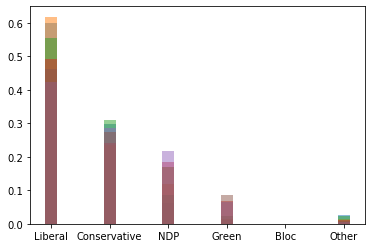

In [48]:
x = np.arange(len(parties))  # the label locations
width = 0.1
for count,i in enumerate(dfUnique[dfUnique['Riding']=='OTTAWA--VANIER'].index):
    plt.bar(x+ width*count,dfUnique[dfUnique['Riding']=='OTTAWA--VANIER']['Results'][i],width=0.2, alpha=0.5)

Int64Index([1, 176, 488, 808, 1117, 1434], dtype='int64')


<BarContainer object of 6 artists>

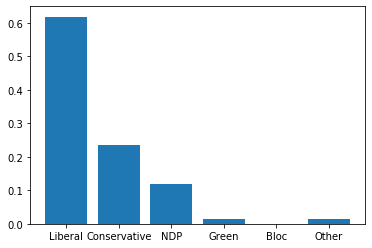

In [45]:
print(dfUnique[dfUnique['Riding']=='OTTAWA--VANIER']['Results'].index)
plt.bar(parties,dfUnique[dfUnique['Riding']=='OTTAWA--VANIER']['Results'][176])

Presentation for sunday
- 5 min or less
- demo aspect (slide or other)
- 